# The Daubechies D4 Wavelet Tranform

##### All functions and variables declaration

In [2]:
from functions import *
import os
import random
import matplotlib.pyplot as plt
from time import time


#### Daubechies coefficients

In [3]:
################## 4 #################
ROOT2, ROOT3 = np.sqrt(2), np.sqrt(3) 

H_COEFFS4 = np.array([(1 + ROOT3) / (4 * ROOT2),(3 + ROOT3) / (4 * ROOT2), (3 - ROOT3) / (4 * ROOT2), (1 - ROOT3) / (4 * ROOT2)])
G_COEFFS4 = np.array([H_COEFFS4[3],-H_COEFFS4[2],H_COEFFS4[1],-H_COEFFS4[0]])


################## 8 #################
H_COEFFS8 = np.array([0.23037781, 0.71484657, 0.63088076, -0.02798376, -0.18703481, 0.03084138, 0.03288301, -0.01059740])
G_COEFFS8 = np.array([-0.01059740, -0.03288301, 0.03084138, 0.18703481, -0.02798376, -0.63088076, 0.71484657, -0.23037781])


##### Checking Orthonormality

In [4]:
h_coeffs, g_coeffs =  H_COEFFS8, G_COEFFS8
verificar_ortonormalidad(h_coeffs, g_coeffs)

The vectors are orthonormal, the dot product is: -8.673617379884035e-19 and the norm of each vector is (0.9999999931242683, 0.9999999931242683) respectively


## NUMERIC EXAMPLE

## IMAGES EXAMPLES

In [5]:
datarute = r'C:\Users\ZIGH\Documents\ENSEA\INTERNSHIP\CNN\UTKFace-crop_Renamed'

image_files = os.listdir(datarute)
random_index = random.randint(0, len(image_files) - 1)
random_image_filename = image_files[random_index]
random_image_path = os.path.join(datarute, random_image_filename)
print(random_image_path)

C:\Users\ZIGH\Documents\ENSEA\INTERNSHIP\CNN\UTKFace-crop_Renamed\86_1_20170110180113129.jpg


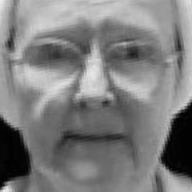

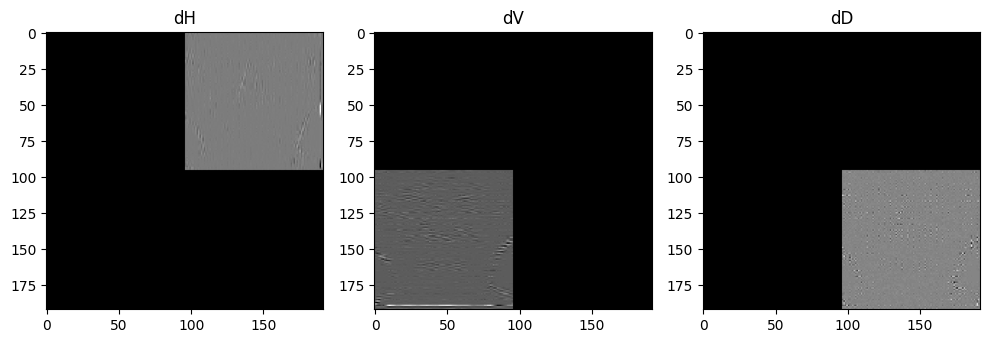

In [6]:
# photo = 'images/foto_dataset1.jpg'
array_photo = jpg_to_pgm(random_image_path)

scale = 1
width = array_photo.shape[0]

daubechies_4 = function_daubechies_coeffs(array_photo, h_coeffs, g_coeffs)



result_img, normalized = daubechies4_wavelet_transform_2D(
    daubechies_4, array_photo, scale, width, h_coeffs, g_coeffs)



# ################### ZERO ADDING ####### dH #############

result_img1 = result_img.copy()
result_img1 = zeros(result_img1, scale, black_frame="appr")
# result_img1 = zeros(result_img1, scale, black_frame="dH")
result_img1 = zeros(result_img1, scale, black_frame="dV")
result_img1 = zeros(result_img1, scale, black_frame="dD")


normalized1 = normalized.copy()
normalized1 = zeros(normalized1, scale, black_frame="appr")
# normalized1 = zeros(normalized1, scale, black_frame="dH")
normalized1 = zeros(normalized1, scale, black_frame="dV")
normalized1 = zeros(normalized1, scale, black_frame="dD")

#######################################################

# ################### ZERO ADDING ####### dV #############

result_img2 = result_img.copy()
result_img2 = zeros(result_img2, scale, black_frame="appr")
result_img2 = zeros(result_img2, scale, black_frame="dH")
# result_img2 = zeros(result_img2, scale, black_frame="dV")
result_img2 = zeros(result_img2, scale, black_frame="dD")


normalized2 = normalized.copy()
normalized2 = zeros(normalized2, scale, black_frame="appr")
normalized2 = zeros(normalized2, scale, black_frame="dH")
# normalized2 = zeros(normalized2, scale, black_frame="dV")
normalized2 = zeros(normalized2, scale, black_frame="dD")

#######################################################

################### ZERO ADDING ####### dD #############

result_img3 = result_img.copy()
result_img3 = zeros(result_img3, scale, black_frame="appr")
result_img3 = zeros(result_img3, scale, black_frame="dH")
result_img3 = zeros(result_img3, scale, black_frame="dV")
# result_img3 = zeros(result_img3, scale, black_frame="dD")


normalized3 = normalized.copy()
normalized3 = zeros(normalized3, scale, black_frame="appr")
normalized3 = zeros(normalized3, scale, black_frame="dH")
normalized3 = zeros(normalized3, scale, black_frame="dV")
# normalized3 = zeros(normalized3, scale, black_frame="dD")

#######################################################

reconstructed1 = inverse_daubechies4_wavelet_transform_2D(
    daubechies_4, result_img1, scale, width, h_coeffs, g_coeffs)

reconstructed2 = inverse_daubechies4_wavelet_transform_2D(
    daubechies_4, result_img2, scale, width, h_coeffs, g_coeffs)

reconstructed3 = inverse_daubechies4_wavelet_transform_2D(
    daubechies_4, result_img3, scale, width, h_coeffs, g_coeffs)

imshow(array_photo, width=192)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(normalized1, cmap='gray')
axes[0].set_title('dH')
axes[1].imshow(normalized2, cmap='gray')
axes[1].set_title('dV')
axes[2].imshow(normalized3, cmap='gray')
axes[2].set_title('dD')

plt.tight_layout()
plt.show()

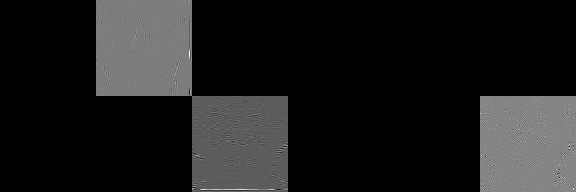

In [15]:
dH_redChannel = np.stack((reconstructed1,)*3, axis=-1)
dH_redChannel[:,:,1] = 0
dH_redChannel[:,:,2] = 0

dV_greenChannel = np.stack((reconstructed2,)*3, axis=-1)
dV_greenChannel[:,:,0] = 0
dV_greenChannel[:,:,2] = 0

dD_blueChannel = np.stack((reconstructed3,)*3, axis=-1)
dD_blueChannel[:,:,0] = 0
dD_blueChannel[:,:,1] = 0


# show reconstructed image
imshow(np.concatenate((normalized1, normalized2, normalized3), axis=1))
       

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


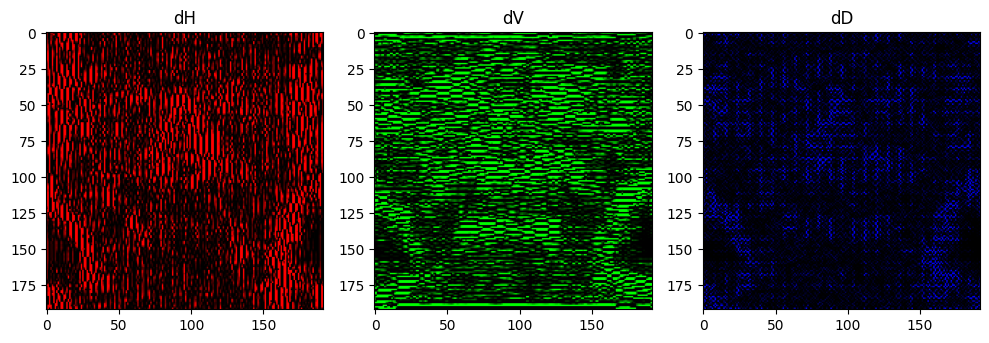

In [11]:
# Show dH_redChannel dV_greenChannel dD_blueChannel in a matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes[0].imshow(dH_redChannel)
axes[0].set_title('dH')
axes[1].imshow(dV_greenChannel)
axes[1].set_title('dV')
axes[2].imshow(dD_blueChannel)
axes[2].set_title('dD')

plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


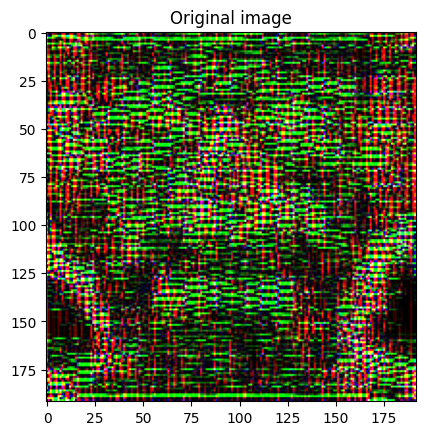

In [12]:
# Add all channels (red, green and blue) to get the original image
original_image = dH_redChannel + dV_greenChannel + dD_blueChannel
plt.imshow(original_image)
plt.title('Original image')
plt.show()